In [2]:
import nltk

In [22]:
with open('7_habits.txt','r') as f:
    habits = f.read()
with open("google.txt", 'r') as f:
    google = f.read()
with open("Penney.txt", 'r') as f:
    penney = f.read()

In [7]:
def get_words(url):
    import requests
    words = requests.get(url).content.decode('latin-1')
    word_list = words.split('\n')
    index = 0
    while index < len(word_list):
        word = word_list[index]
        if ';' in word or not word:
            word_list.pop(index)
        else:
            index+=1
    return word_list

p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
positive_words = get_words(p_url)
negative_words = get_words(n_url)

In [18]:
def get_sentiment(data):
    from nltk import word_tokenize
    pos = neg = 0
    for word in word_tokenize(habits):
        if word in positive_words:
            pos+=1
        if word in negative_words:
            neg+=1
    print(" {0:1.2f}%\t {1:1.2f}%\t {2:1.2f}%".format(pos/len(word_tokenize(data))*100,
                                                        neg/len(word_tokenize(data))*100,
                                                        (pos-neg)/len(word_tokenize(data))*100))
            

In [23]:
get_sentiment(penney)

 7.85%	 5.07%	 2.78%


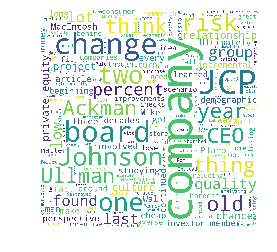

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(penney)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
from nltk import sent_tokenize,word_tokenize 
def get_complexity(text):
    num_chars=len(text)
    num_words=len(word_tokenize(text))
    num_sentences=len(sent_tokenize(text))
    vocab = {x.lower() for x in word_tokenize(text)}
    return len(vocab),int(num_chars/num_words),int(num_words/num_sentences),len(vocab)/num_words

In [25]:
get_complexity(penney)

(439, 5, 17, 0.4200956937799043)

In [26]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [31]:
inputs = [("7 Habits", habits), ("Google", google), ("JC Penney", penney)]

In [32]:
vader_comparison(inputs)

Name	   pos	 neg	 neu	 compound
7 Habits   0.13	 0.08	 0.79	 0.13	
Google     0.11	 0.05	 0.84	 0.15	
JC Penney  0.09	 0.08	 0.83	 0.02	


In [42]:
def build_naive_summary(text):
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import sent_tokenize
    from nltk.probability import FreqDist
    from nltk.corpus import stopwords
    from collections import OrderedDict
    summary_sentences = []
    candidate_sentences = {}
    candidate_sentence_counts = {}
    striptext = text.replace('\n\n', ' ')
    striptext = striptext.replace('\n', ' ')
    words = word_tokenize(striptext)
    lowercase_words = [word.lower() for word in words
                      if word not in stopwords.words() and word.isalpha()]
    word_frequencies = FreqDist(lowercase_words)
    most_frequent_words = FreqDist(lowercase_words).most_common(20)
    sentences = sent_tokenize(striptext)
    for sentence in sentences:
        candidate_sentences[sentence] = sentence.lower()
    for long, short in candidate_sentences.items():
        count = 0
        for freq_word, frequency_score in most_frequent_words:
            if freq_word in short:
                count += frequency_score
                candidate_sentence_counts[long] = count   
    sorted_sentences = OrderedDict(sorted(
                        candidate_sentence_counts.items(),
                        key = lambda x: x[1],
                        reverse = True)[:10])
    return sorted_sentences   

In [43]:
build_naive_summary(google)

OrderedDict([('So long as ideas meet these three criteria, Google employees are free to develop ideas in their 20 percent time.',
              76),
             ("Twenty percent time is Google's policy, which allows engineers to spend 20 percent of their time working on anything they choose.",
              76),
             ("The genius of the company's structure is that it allows stability for the 70 percent time while also fostering a lean start up mindset to constantly develop new products.",
              68),
             ('In another environment they might seem odd or irreverent, but at Google they build the products that change the world.',
              68),
             ('Communicate In his early days working at Google, Jonathan was called an expensive router because he spent a lot of time transferring information between departments.',
              67),
             ('For example, the company trumps bottom up management rather than top down, product development rather than

In [44]:
build_naive_summary(habits)

OrderedDict([('Covey says this is the mark of a true professional An effective sales person first seeks to understand the needs, the concerns, the situation of the customer.',
              78),
             ('Habit 2: Begin with the End in Mind Once a person, understands they alone control their success and failure, they are free to pursue, a comprehensive, not a political solution.',
              73),
             ('Habit 3: Put First Things First Understanding the tradeoff between leadership and management brings us to planning.',
              68),
             ('They destroy business value, solely to block others.', 67),
             ('Understanding the value of treating others with respect, how then can we develop these skills?',
              64),
             ('Nobody cares how much you know, until they know how much you care If we are working from the end in mind and accept responsibility for our success and failure, then we accept ordering people around does not work.',
    

In [45]:
build_naive_summary(penney)

OrderedDict([('Like Mr. MacIntosh, I think we can learn a lot about business from studying JCP In fact, with a group of three others, I spent most of my last semester analyzing the company.',
              69),
             ("If the company had tweaked its strategy in the last two decades such changes wouldn't have been necessary.",
              68),
             ('What we found The JCP narrative is that Ron Johnson singlehandedly destroyed the company.',
              64),
             ('Alas, the hardest part was what would we tell the board and Mike Ullman who continued to profit as the company circled the drain.',
              64),
             ("Change incrementally so you don't have to change abruptly Johnson and Ackman were forced to make sweeping changes because the company had been complacent for a long time.",
              63),
             ('Our goal was to develop a buyout plan, from the perspective of a private equity group, and present it to a fake JCP board, consistin

In [46]:
import gensim.summarization

In [47]:
text = google
summary_sentences = []
candidate_sentences = {}
candidate_sentence_counts = {}
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

In [54]:
summary = gensim.summarization.summarize(penney, word_count=100) 
print(summary)

Like Mr. MacIntosh, I think we can learn a lot about business from studying JCP
Our goal was to develop a buyout plan, from the perspective of a private equity group, and present it to a fake JCP board, consisting of fellow students, in order to purchase the company.
JCP's core demographic of 35-55 year-old women was repelled when the company moved to "every day low pricing." That being said the collapse of JCP can't be put on one man.
Johnson and Ackman were forced to make sweeping changes because the company had been complacent for a long time.
